In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
%matplotlib inline

In [3]:
plt.style.use("fivethirtyeight");

In [4]:
plt.rcParams["figure.figsize"] = (10.0, 10.0)

In [5]:
def is_prime(num, prime):
    for i in prime:
        if num != 2 and i < num ** 0.5:
            if math.gcd(num, i) != 1:
                return False
    if num != 0 and num != 1:
        return True
    else:
        return False

In [6]:
def check_prime(num):
    smaller_primes = [2]
    for i in range(3, num):
        if is_prime(i, smaller_primes):
            smaller_primes.append(i)
    return is_prime(num, smaller_primes)

In [7]:
def generate_primes(limit):
    if limit < 2:
        return []
    else:
        smaller_primes = [2]
        for i in range(3, limit+1):
            if is_prime(i, smaller_primes):
                smaller_primes.append(i)
        return smaller_primes

In [8]:
def generate_square_matrix(size):
    return [[i + (size * j) for i in range(1,size+1)] for j in range(size)]

In [9]:
def generate_color_matrix(size):
    num_mat = generate_square_matrix(size)
    num_primes = generate_primes(size**2)
    color_prime = []
    for i in num_mat:
        sub = []
        for j in i:
            if j in num_primes:
                sub.append(1)
            else:
                sub.append(0)
        color_prime.append(sub)
#     labels = pd.DataFrame(num_mat)
#     labels = labels.astype(str)
# , annot=pd.DataFrame(num_mat)
    sns.heatmap(color_prime, linewidths=size/(size*50), 
                cbar = False, xticklabels=np.arange(1,size+1), 
                yticklabels=np.arange(0, size**2, size));
    plt.xticks(rotation=0);
    plt.yticks(rotation=0);
    plt.title("{} by {}".format(size, size), fontsize=20);
    plt.savefig("size_{}_by_{}.png".format(size, size))
    return color_prime

# Heatmaps

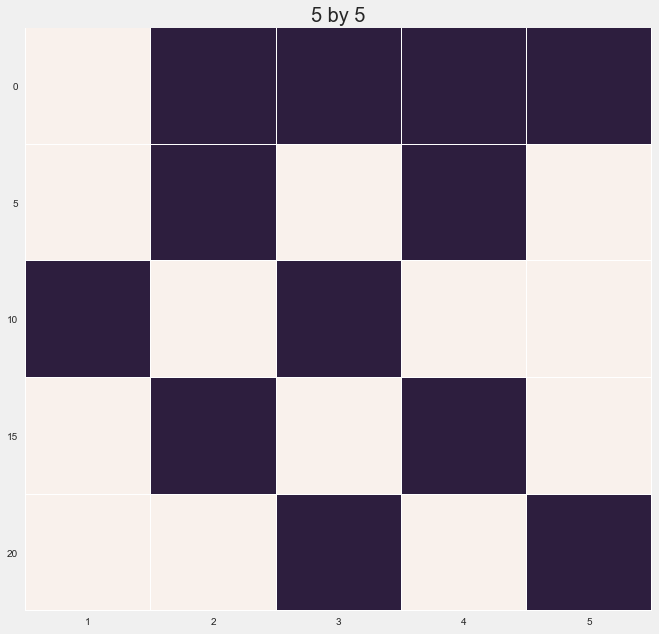

In [10]:
_ = generate_color_matrix(5)

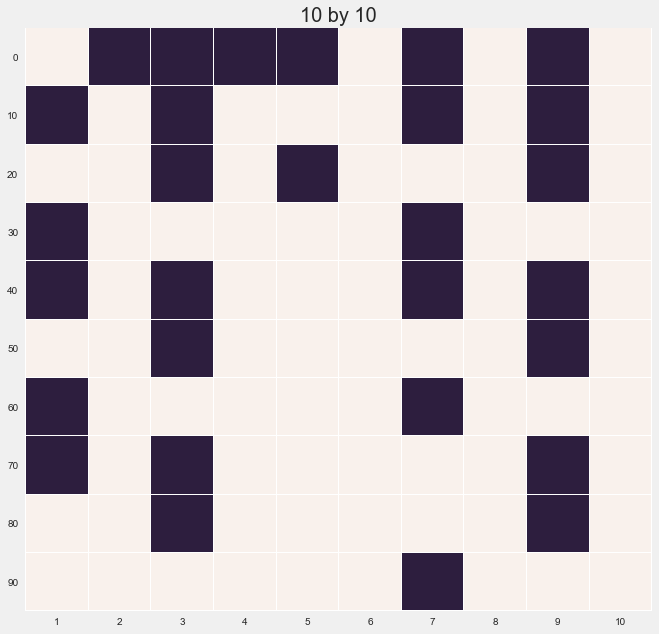

In [11]:
_ = generate_color_matrix(10)

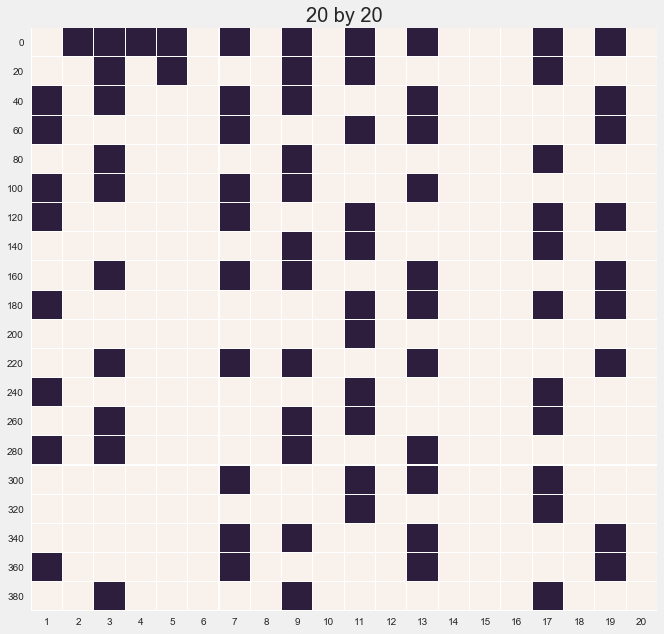

In [12]:
_ = generate_color_matrix(20)

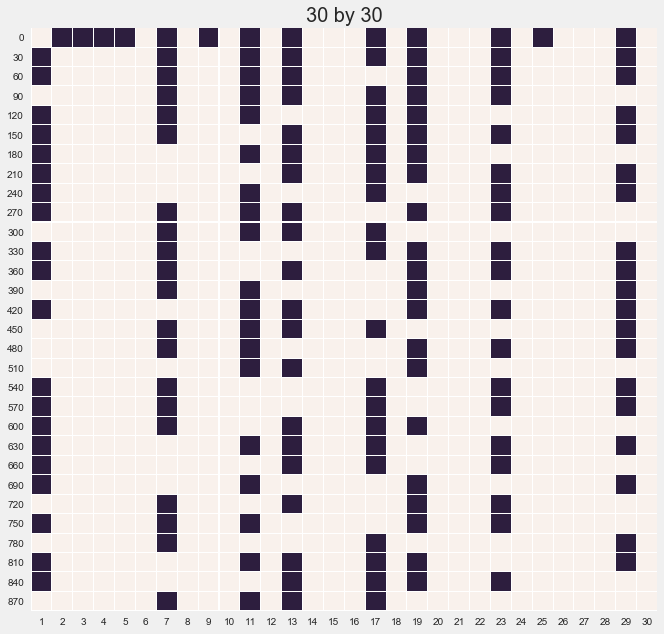

In [13]:
_ = generate_color_matrix(30)

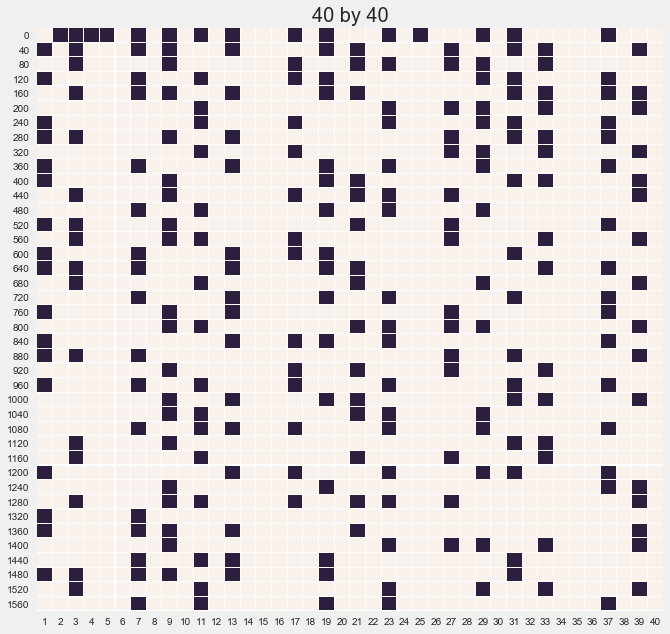

In [14]:
_ = generate_color_matrix(40)

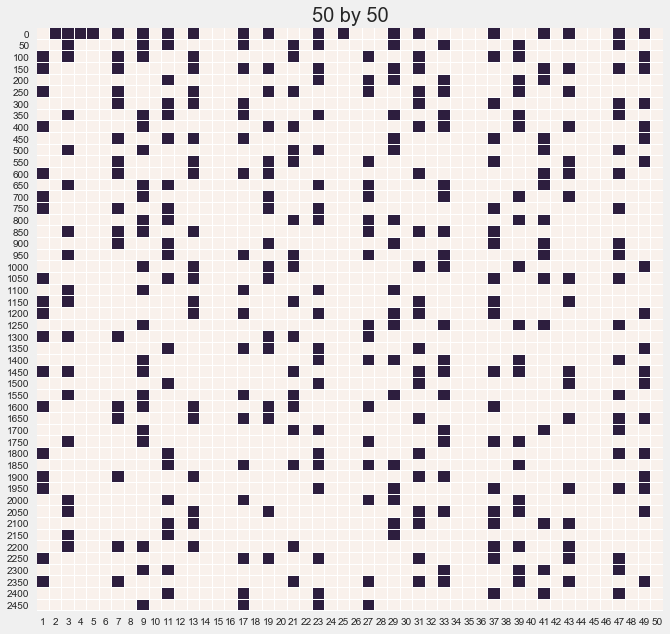

In [15]:
_ = generate_color_matrix(50)

# Number of primes

In [16]:
def get_number_of_primes(limit):
    data = [len(generate_primes(i)) for i in range(limit)]
    return data

In [17]:
generate_primes(1)

[]

In [22]:
def primes_in_N(stop):
    num_primes = get_number_of_primes(stop)
    data = pd.DataFrame(num_primes, columns=["number_of_primes"])
    data = data.number_of_primes.drop_duplicates().to_frame()
    data.reset_index(inplace = True);
    data.columns = ["N", "number_of_primes"]
    plt.plot(data.N, data.number_of_primes);
    plt.title("Number of primes from 0 to N", fontsize=20);
#     plt.savefig("num_primes.png");

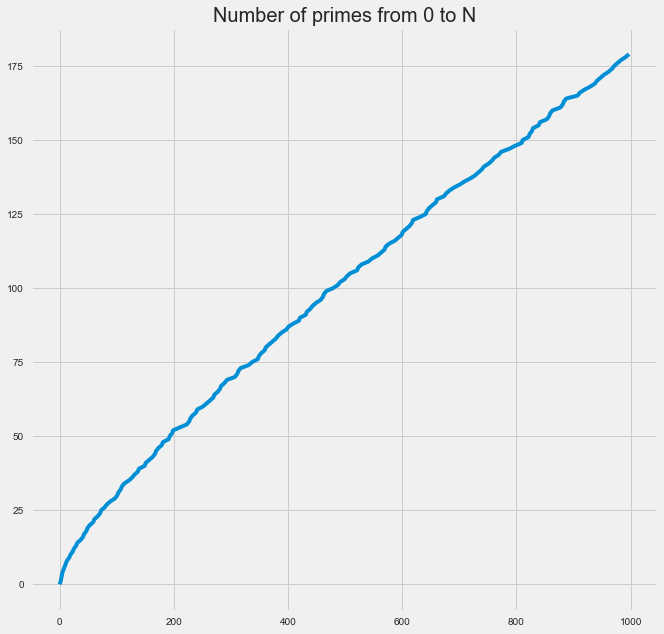

In [21]:
primes_in_N(1000);

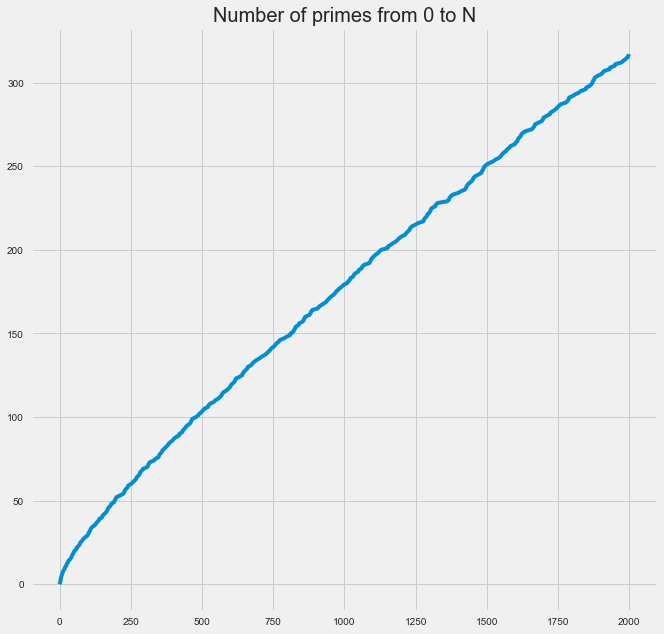

In [23]:
primes_in_N(2000);

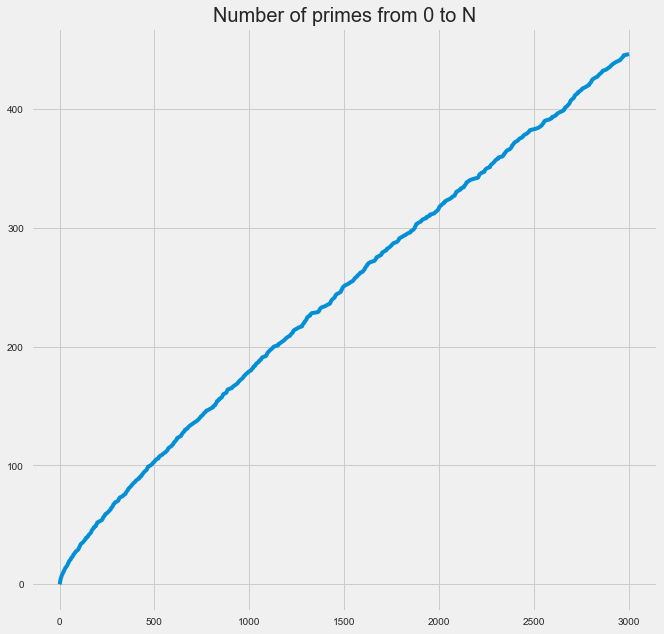

In [24]:
primes_in_N(3000);

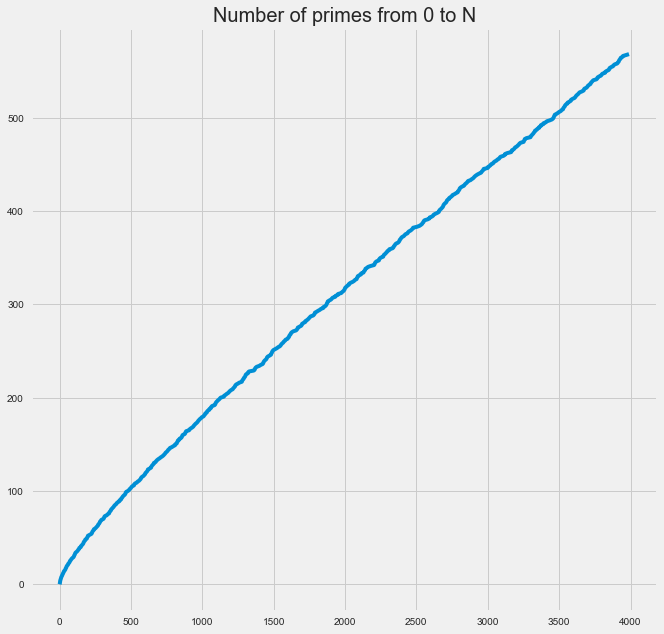

In [26]:
primes_in_N(4000);

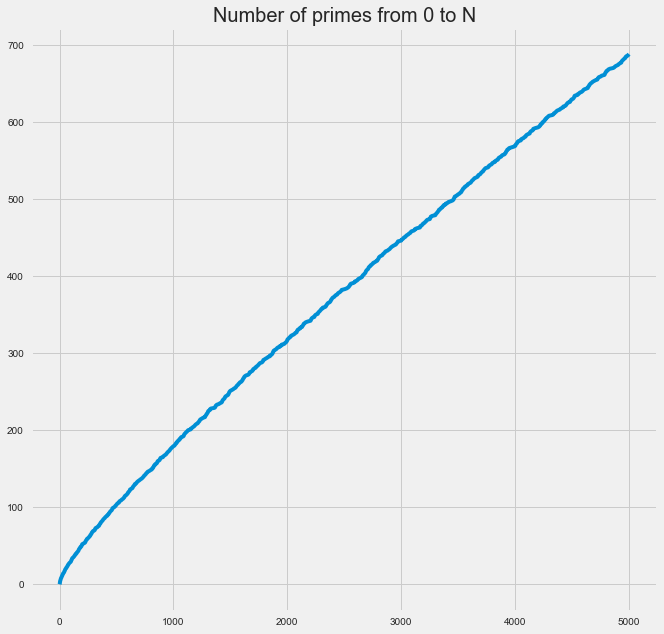

In [27]:
primes_in_N(5000);